In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv('/content/api_data_aadhar_enrolment_0_500000.csv', encoding='latin1')
df2 = pd.read_csv('/content/api_data_aadhar_enrolment_500000_1000000.csv', encoding='latin1')
df3 = pd.read_csv('/content/api_data_aadhar_enrolment_500000_1000000.csv', encoding='latin1')
df = pd.concat([df1,df2,df3])
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121.0,11.0,61.0,37.0
1,09-03-2025,Karnataka,Bengaluru Urban,560043.0,14.0,33.0,39.0
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001.0,29.0,82.0,12.0
3,09-03-2025,Uttar Pradesh,Aligarh,202133.0,62.0,29.0,15.0
4,09-03-2025,Karnataka,Bengaluru Urban,560016.0,14.0,16.0,21.0


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 620149 entries, 0 to 206710
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            620149 non-null  object 
 1   state           620149 non-null  object 
 2   district        620149 non-null  object 
 3   pincode         620149 non-null  int64  
 4   age_0_5         620148 non-null  float64
 5   age_5_17        620148 non-null  float64
 6   age_18_greater  620146 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 37.9+ MB


,pincode,age_0_5,age_5_17,age_18_greater
count,620149.000000,620148.000000,620148.000000,620146.000000
mean,519908.601928,3.868362,2.056333,0.221095
std,206142.037265,22.041287,18.162051,4.008257
min,679.000000,0.000000,0.000000,0.000000
25%,363530.000000,1.000000,0.000000,0.000000
50%,518345.000000,2.000000,0.000000,0.000000
75%,700138.000000,3.000000,1.000000,0.000000
max,855456.000000,2688.000000,1812.000000,855.000000


In [ ]:
df = df.dropna()

In [ ]:
df['Enrolment'] = df['age_0_5'] + df['age_5_17'] + df['age_18_greater']
state_data = df.groupby('state')['Enrolment'].sum()
state_data.sort_values(ascending=False).head()

,Enrolment
state,
Uttar Pradesh,804871.0
Bihar,427226.0
Madhya Pradesh,371598.0
West Bengal,282260.0
Maharashtra,262942.0


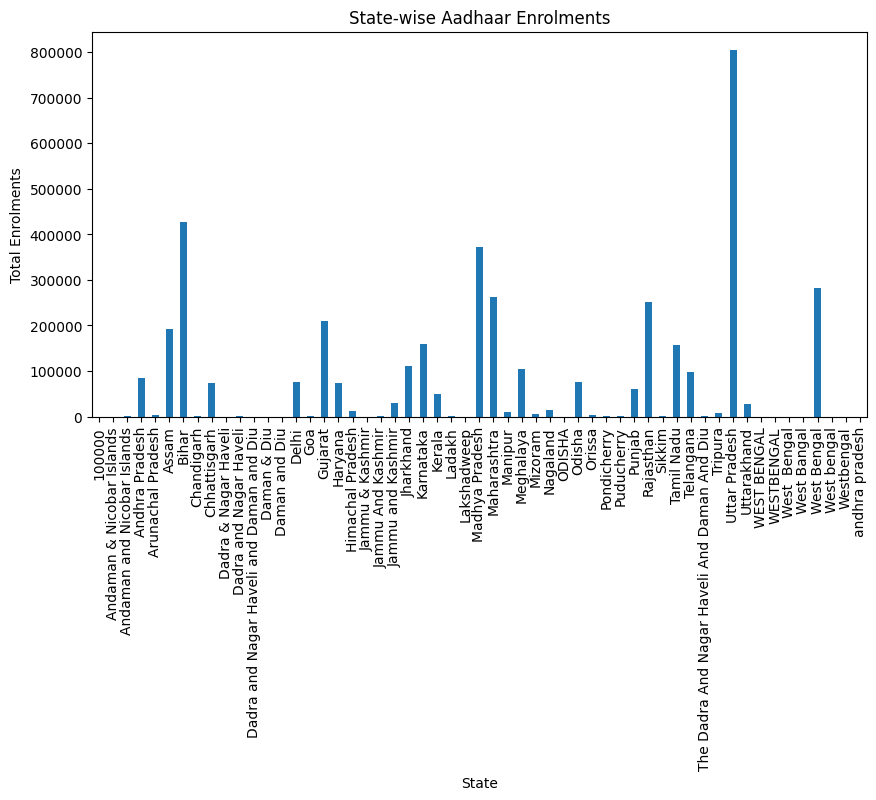

In [ ]:
state_data.plot(kind='bar', figsize=(10,5))
plt.title('State-wise Aadhaar Enrolments')
plt.xlabel('State')
plt.ylabel('Total Enrolments')
plt.show()

In [ ]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [ ]:
df['Year'] = df['date'].dt.year

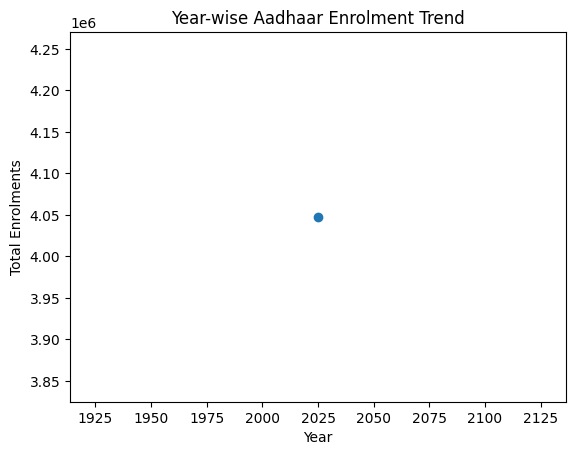

In [ ]:
year_data = df.groupby('Year')['Enrolment'].sum()

year_data.plot(kind='line', marker='o')
plt.title('Year-wise Aadhaar Enrolment Trend')
plt.xlabel('Year')
plt.ylabel('Total Enrolments')
plt.show()